In [27]:
import pandas as pd

In [28]:
df=pd.read_csv('train (6).csv')

In [29]:
df.shape   # 42000 images and 28*28 =785 pixel   

(42000, 785)

In [30]:
df.head()   

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# without using pca 

In [31]:
df.sample()   # lable is denote value 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29889,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
import matplotlib.pyplot as plt

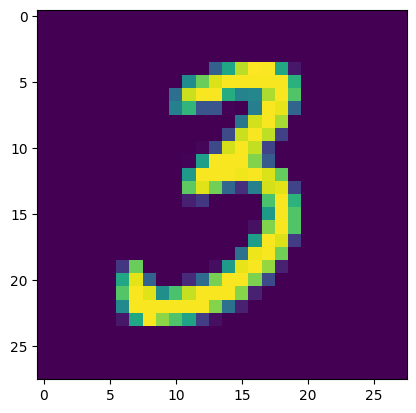

In [33]:
plt.imshow(df.iloc[21766,1:].values.reshape(28,28))      # reshape(-1 ,28)  -1 means automatic find kiti rows alya pahije 

In [34]:
x=df.iloc[ : ,1:]

In [35]:
y=df.iloc[ : ,0]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2 ,random_state=42)

In [38]:
xtrain.shape

(33600, 784)

In [39]:
xtest.shape

(8400, 784)

In [40]:
from sklearn.neighbors import KNeighborsClassifier


In [41]:
knn= KNeighborsClassifier()

In [42]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [43]:
import time 

start=time.time()
y_pread=knn.predict(xtest)

av=(time.time()-start)



In [44]:
from sklearn.metrics import accuracy_score 

In [45]:
accuracy_score(ytest,y_pread)

0.9648809523809524

# using pca sklearn

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
xtrainn=scaler.fit_transform(xtrain)

In [49]:
xtestt=scaler.transform(xtest)

In [50]:
xtrainn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(33600, 784))

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=100)


In [53]:
x_tainn = pca.fit_transform(xtrainn)

In [54]:
x_testt = pca.transform(xtestt)

In [55]:
x_tainn.shape

(33600, 100)

In [56]:
knn= KNeighborsClassifier()

In [57]:
knn.fit(x_tainn,ytrain)

KNeighborsClassifier()

In [58]:
y_pr=knn.predict(x_testt)

In [59]:
accuracy_score(ytest,y_pr)

0.9544047619047619

In [60]:
# for i in range (1,784):
#     pca = PCA(n_components=i)
#     x_tainn = pca.fit_transform(xtrainn)
#     x_testt = pca.transform(xtestt)
#     knn= KNeighborsClassifier()
#     knn.fit(x_tainn,ytrain)
#     y_pr=knn.predict(x_testt)
#     ac= accuracy_score(ytest,y_pr)
#     print(ac)
    

# visulize  

# 2D

In [67]:
pca = PCA(n_components=2)
x_tainn_d = pca.fit_transform(xtrainn)
x_testt_d = pca.transform(xtestt)

In [68]:
x_tainn_d

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]], shape=(33600, 2))

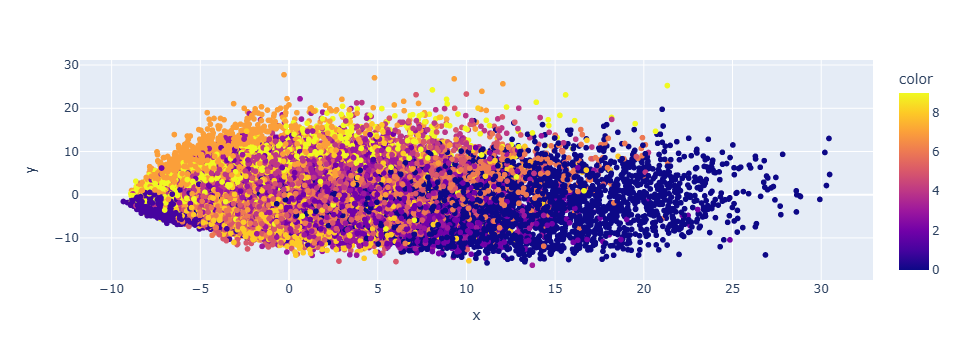

In [73]:
import plotly.express as px  #  plotly. it is visualization library menly  use for  click on the point show  point detail
y_train_d=ytrain.astype(str)
fig= px.scatter(x=x_tainn_d[:,0],
                y=x_tainn_d[:,1],
                color=ytrain,
                color_discrete_sequence=px.colors.qualitative.G10 )
fig.show()
                

# 3D

In [74]:
pca = PCA(n_components=3)
x_tainn_dd = pca.fit_transform(xtrainn)
x_testt_dd = pca.transform(xtestt)

In [76]:
x_tainn_dd

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]], shape=(33600, 3))

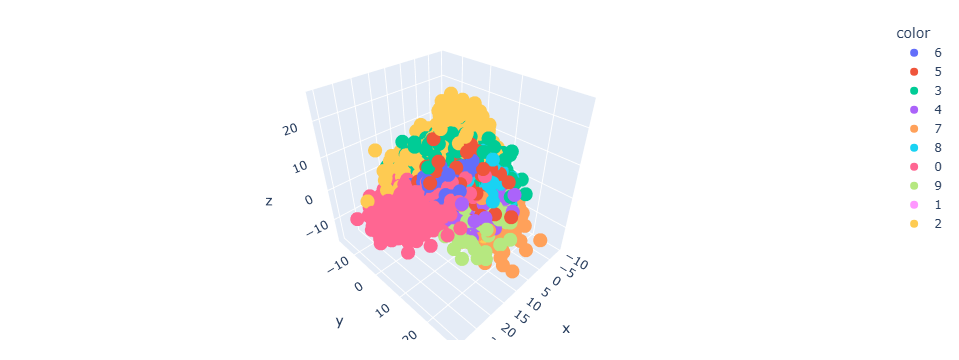

In [84]:
fig = px.scatter_3d(
    x=x_tainn_dd[:,0],
    y=x_tainn_dd[:,1],
    z=x_tainn_dd[:,2],
    color=ytrain.astype(str)
)

fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()


In [ ]:
# color is overlap means almost value is same like 8 or 3

In [86]:
pca.explained_variance_
# eighan value 

array([40.67111198, 29.17023401, 26.74459621])

In [89]:
pca.components_
# eighan vector

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], shape=(3, 784))

In [90]:
pca.components_.shape

(3, 784)

#  find value where  maximum  number of variance is present 

In [91]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(xtrainn)
X_test_trf = pca.transform(xtestt)

In [92]:
pca.explained_variance_.shape


(784,)

In [93]:
pca.components_.shape


(784, 784)

In [95]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)


array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

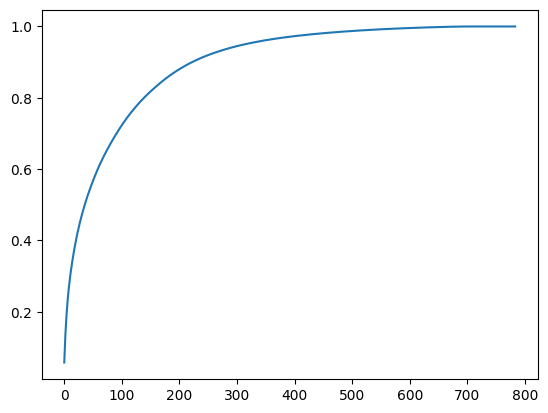

In [96]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [ ]:
# then it can show  350  variance is 90 pluse 

# where pca is not help

In [ ]:
# see image 